In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../NumPy/input/국민건강보험공단_건강검진정보_20221231.csv', encoding='cp949')
data.head()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세 단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증율,제3대구치(사랑니)이상,치석
0,2022,3008666,41,1,11,160,80,100.0,0.9,1.0,...,47.0,108.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2022,2204972,46,2,9,150,55,70.0,0.9,1.2,...,13.0,19.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2022,3210310,48,1,10,180,70,89.0,1.0,1.5,...,14.0,19.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2022,206345,26,2,14,150,50,68.0,0.7,0.8,...,38.0,21.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN
4,2022,1180297,41,2,10,165,55,69.0,0.7,1.0,...,15.0,12.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0


In [25]:
data.rename(columns={'신장(5cm단위)' : 'cm', '성별' : 'gender', '흡연상태' : 'ciga', '연령대코드(5세 단위)' : 'age'}, inplace=True)
data.columns

Index(['기준년도', '가입자일련번호', '시도코드', 'gender', 'age', 'cm', '체중(5kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', 'ciga', '음주여부', '구강검진수검여부',
       '치아우식증유무', '결손치유무', '치아마모증율', '제3대구치(사랑니)이상', '치석'],
      dtype='object')

In [11]:
man_data = data.loc[data.gender == 1.0, ['gender', 'cm']]
man_data.head()

,gender,cm
0,1,160
2,1,180
5,1,175
7,1,170
9,1,165


In [13]:
woman_data = data.loc[data.gender == 2.0, ['gender', 'cm']]
woman_data.head()

,gender,cm
1,2,150
3,2,150
4,2,165
6,2,155
8,2,145


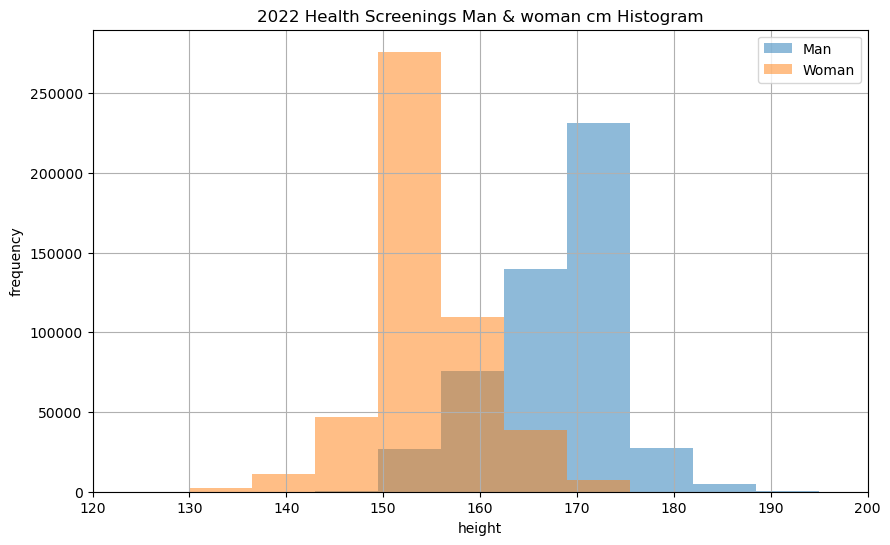

In [22]:
plt.figure(figsize=(10,6))
plt.hist(man_data['cm'], bins=10,alpha=0.5 ,label='Man')
plt.hist(woman_data['cm'], bins=10,alpha=0.5 ,label='Woman')
plt.title('2022 Health Screenings Man & woman cm Histogram')
plt.xlabel('height')
plt.ylabel('frequency')
plt.xlim(120, 200)
plt.legend()
plt.grid()
plt.show()

In [23]:
data.value_counts('흡연상태')

흡연상태
1.0    631381
2.0    185057
3.0    183448
Name: count, dtype: int64

In [34]:
ciga_data=data.loc[data.ciga == 3.0, ['age', 'ciga']]
ciga_data.head()

,age,ciga
0,11,3.0
2,10,3.0
20,11,3.0
32,10,3.0
36,9,3.0


In [47]:
ciga_data1 = ciga_data.groupby('age').count()  # 건강보험에서 실시하는 건강보험이 40세부터 받아서
ciga_data1.head()

,ciga
age,
9,40096
10,33546
11,38338
12,25290
13,24254


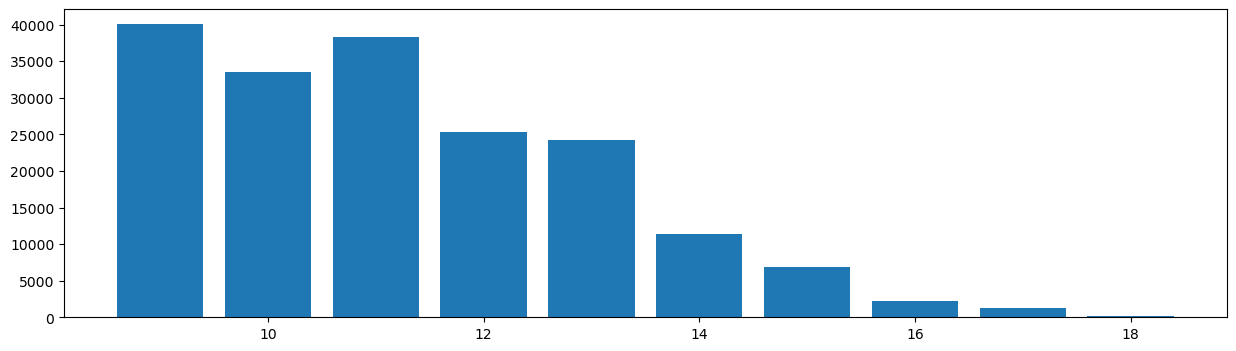

In [49]:
plt.figure(figsize=(15,4))
plt.bar(ciga_data1.index, ciga_data1['ciga'])
plt.show()

In [51]:
ciga_data1.index = ['40~44', '45~49', '50~54', '55~59', '60~64', '65~69', '70~74', '75~79', '80~84', '85+']

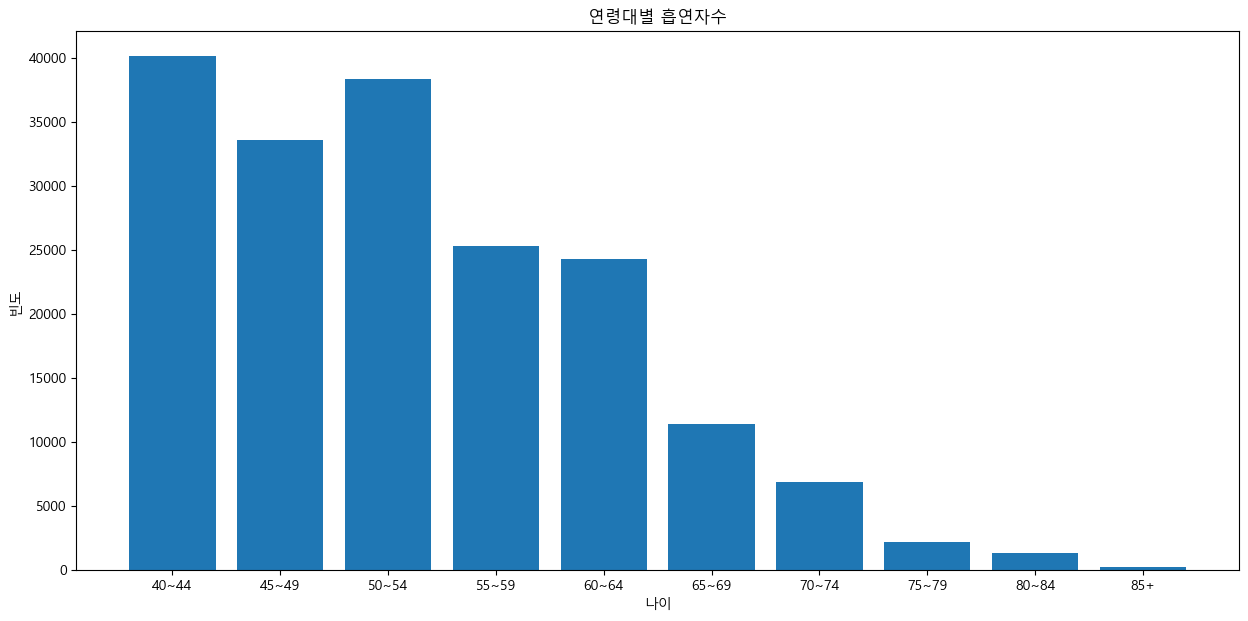

In [57]:
import matplotlib         # 한글쓸떄 이 3줄 항상 필요
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 지정
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,7))
plt.bar(ciga_data1.index, ciga_data1['ciga'])
plt.title('연령대별 흡연자수')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.show()